## importacion de las librerias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

## carga de datos

vamos a tratar las columnas de fecha como tipo de dato datetime

In [55]:
df = pd.read_csv('../data/raw/bank-additional.csv', index_col=0)

## analisis preliminar

In [56]:
df.sample(5)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
33765,NaN,blue-collar,SINGLE,basic.4y,0.0,0.0,0.0,cellular,902,1,999,0,NONEXISTENT,-1.8,"92,893","-46,2","1,281","5099,1",yes,19-marzo-2018,36.963,-73.399,a8035fdb-ee2b-496b-9df4-1bd05692416c
12748,29.0,admin.,SINGLE,high.school,0.0,1.0,0.0,cellular,259,1,999,0,NONEXISTENT,1.4,"93,918","-42,7","4,962","5228,1",no,8-octubre-2016,44.227,-74.652,67be40c2-2316-486c-b894-cd6e876b387a
24937,30.0,admin.,DIVORCED,university.degree,0.0,0.0,0.0,cellular,464,1,999,0,NONEXISTENT,-0.1,"93,2",-42,NaN,"5195,8",no,31-marzo-2016,45.073,-101.029,dbd39ba9-668b-4e15-a7b3-e62dc4f9246a
11414,40.0,blue-collar,MARRIED,high.school,0.0,1.0,1.0,telephone,63,1,999,0,NONEXISTENT,1.4,"94,465","-41,8","4,959","5228,1",no,6-noviembre-2019,27.738,-105.010,6ab262e9-16b0-46f4-92af-315ed382ffe3
6028,44.0,technician,DIVORCED,basic.9y,NaN,0.0,0.0,telephone,472,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,7-julio-2019,32.936,-89.718,cbe862a0-409b-442a-940e-3f6968d19829


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43000 entries, 0 to 27570
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37880 non-null  float64
 1   job             42655 non-null  object 
 2   marital         42915 non-null  object 
 3   education       41193 non-null  object 
 4   default         34019 non-null  float64
 5   housing         41974 non-null  float64
 6   loan            41974 non-null  float64
 7   contact         43000 non-null  object 
 8   duration        43000 non-null  int64  
 9   campaign        43000 non-null  int64  
 10  pdays           43000 non-null  int64  
 11  previous        43000 non-null  int64  
 12  poutcome        43000 non-null  object 
 13  emp.var.rate    43000 non-null  float64
 14  cons.price.idx  42529 non-null  object 
 15  cons.conf.idx   43000 non-null  object 
 16  euribor3m       33744 non-null  object 
 17  nr.employed     43000 non-null  obje

## columnas del dataset 

- age: La edad del cliente.
- job: La ocupación o profesión del cliente.
- marital: El estado civil del cliente.
- education: El nivel educativo del cliente.
- default: Indica si el cliente tiene algún historial de incumplimiento de pagos(1: Sí, 0: No).
- housing: Indica si el cliente tiene un préstamo hipotecario (1: Sí, 0: No).
- loan: Indica si el cliente tiene algún otro tipo de préstamo (1: Sí, 0: No).
- contact: El método de contacto utilizado para comunicarse con el cliente.
- duration: La duración en segundos de la última interacción con el cliente.
- campaign: El número de contactos realizados durante esta campaña para este cliente.
- pdays: Número de días que han pasado desde la última vez que se contactó con el cliente durante esta campaña.
- previous: Número de veces que se ha contactado con el cliente antes de esta campaña.
- poutcome: Resultado de la campaña de marketing anterior.
- emp.var.rate: La tasa de variación del empleo.
- cons.price.idx: El índice de precios al consumidor.
- cons.conf.idx: El índice de confianza del consumidor.
- euribor3m: La tasa de interés de referencia a tres meses.
- nr.employed: El número de empleados.
- y: Indica si el cliente ha suscrito un producto o servicio (Sí/No).
- date: La fecha en la que se realizó la interacción con el cliente.
- contact_month: Mes en el que se reafeflizó la interacción con el cliente durante la campaña de marketing.
- contact_year: Año en el que se realizó la interacción con el cliente durante la campaña de marketing.
- id_: Un identificador único para cada registro en el dataset.


## analisis de fechas

convertimos la columna a formato datetime y comprobamos valores unicos para el intervalo de tiempo

In [58]:
meses = {'enero':'01',
         'febrero':'02',
         'marzo':'03',
         'abril':'04',
         'mayo':'05',
         'junio':'06',
         'julio':'07',
         'agosto':'08',
         'septiembre':'09',
         'octubre':'10',
         'noviembre':'11',
         'diciembre':'12'}

In [59]:
df.replace({'date':meses}, regex=True, inplace= True)
df.sample()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
21444,35.0,admin.,MARRIED,university.degree,0.0,1.0,0.0,cellular,344,2,999,0,NONEXISTENT,1.4,"93,444","-36,1","4,963","5228,1",no,15-09-2016,26.828,-69.665,a2e5c3f0-dfe8-4ce8-8b5a-f9a380d3cc17


In [60]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

In [61]:
df['date'].dt.year.unique()

array([2019., 2016., 2015., 2017., 2018.,   nan])

## duplicados

In [62]:
df.duplicated().sum()

np.int64(0)

no tenemos duplicados en el df, no es necesario eliminarlos

## valores nulos

comprobar el total de valores nulos que tenemos

In [63]:
nulos = df.isna().sum()
nulos[nulos != 0]

age               5120
job                345
marital             85
education         1807
default           8981
housing           1026
loan              1026
cons.price.idx     471
euribor3m         9256
date               248
dtype: int64

si son muchos o pocos, vemos en porcentaje

In [64]:
nulos_porc =round(df.isnull().mean()*100,2)
nulos_porc[nulos_porc != 0]

age               11.91
job                0.80
marital            0.20
education          4.20
default           20.89
housing            2.39
loan               2.39
cons.price.idx     1.10
euribor3m         21.53
date               0.58
dtype: float64

vemos que tenemos algunas columnas con nulos, de las cuales:
- **job, marital, education, housing, loan, cons.price.idx y date**: pocos nulos, menos del 5%
- **age**: cantidad moderada, 11.9%
- **default y euribor3m**: alta cantidad de nulos 20.8% y 21.5%

debemos gestionar adecuadamente especialmente las columnas de default y euribor3m  

## variables numericas

reemplazamos ',' por '.' en las columnas numericas que nos estan mostrando como object (cons.price.idx	cons.conf.idx	euribor3m	nr.employed)

In [65]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.replace(',','.')
    try:
        df[col] = df[col].astype(float)
    except:
        pass

In [66]:
df.describe(include='number').T.round(2)

,count,mean,std,min,25%,50%,75%,max
age,37880.0,39.98,10.44,17.00,32.00,38.00,47.00,98.00
default,34019.0,0.00,0.01,0.00,0.00,0.00,0.00,1.00
housing,41974.0,0.54,0.50,0.00,0.00,1.00,1.00,1.00
loan,41974.0,0.16,0.36,0.00,0.00,0.00,0.00,1.00
duration,43000.0,257.74,258.67,0.00,102.00,179.00,319.00,4918.00
campaign,43000.0,2.57,2.77,1.00,1.00,2.00,3.00,56.00
pdays,43000.0,962.33,187.26,0.00,999.00,999.00,999.00,999.00
previous,43000.0,0.17,0.50,0.00,0.00,0.00,0.00,7.00
emp.var.rate,43000.0,0.08,1.57,-3.40,-1.80,1.10,1.40,1.40
cons.price.idx,42529.0,93.57,0.58,92.20,93.08,93.75,93.99,94.77


- las columnas de latitud y longitud no coinciden con el informe otorgado, decidimos eliminarlas


In [67]:
df = df.drop(columns=['latitude','longitude'])

In [68]:
col_numericas = df.select_dtypes(include='number').columns

## histogramas

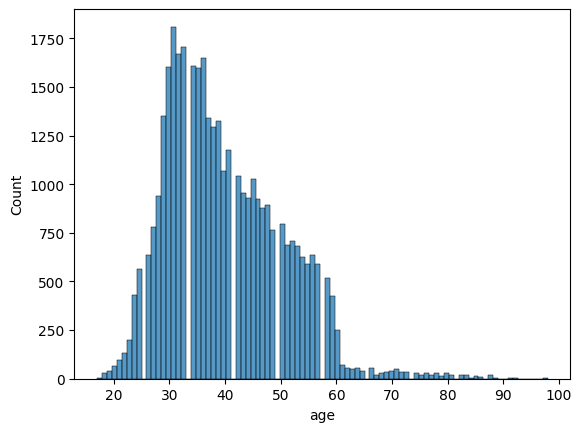

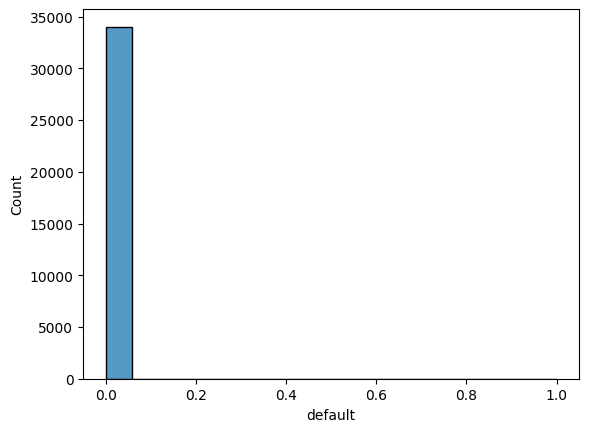

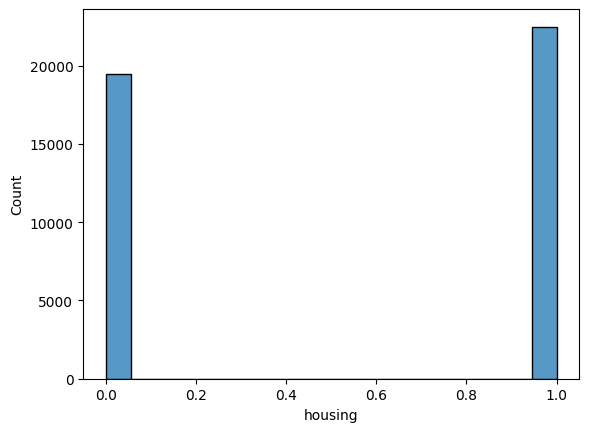

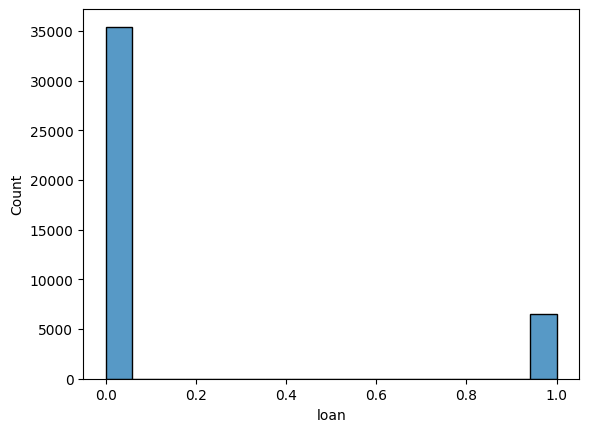

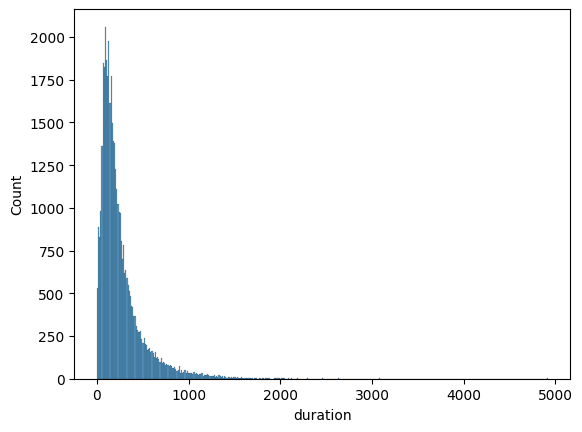

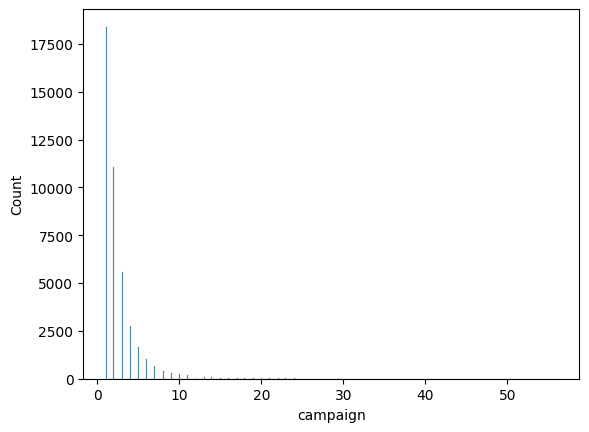

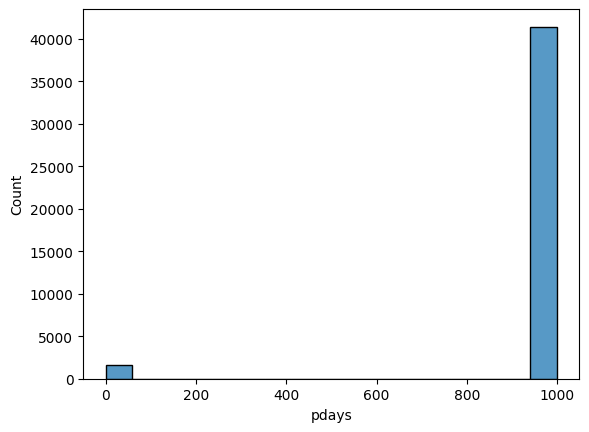

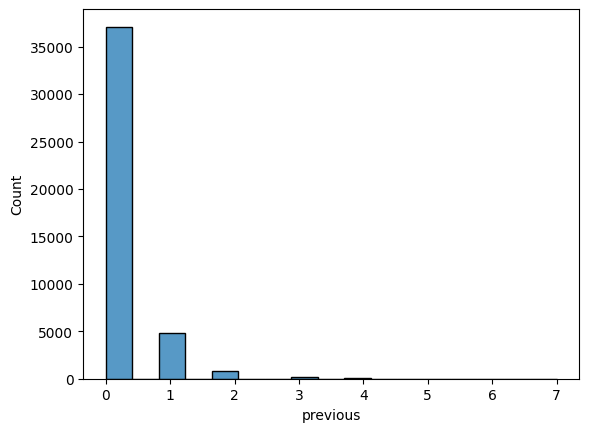

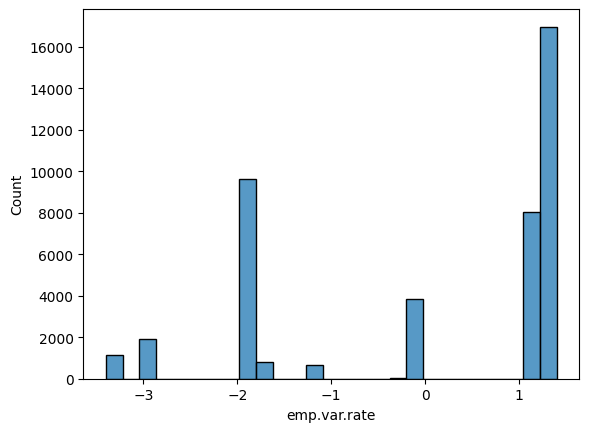

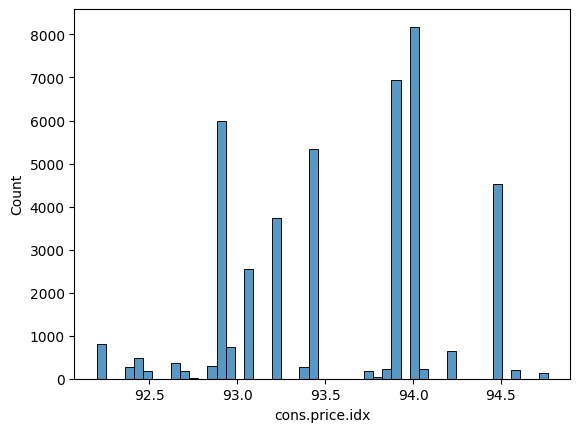

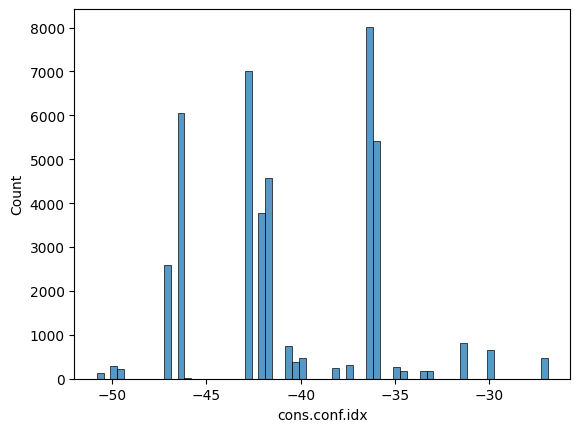

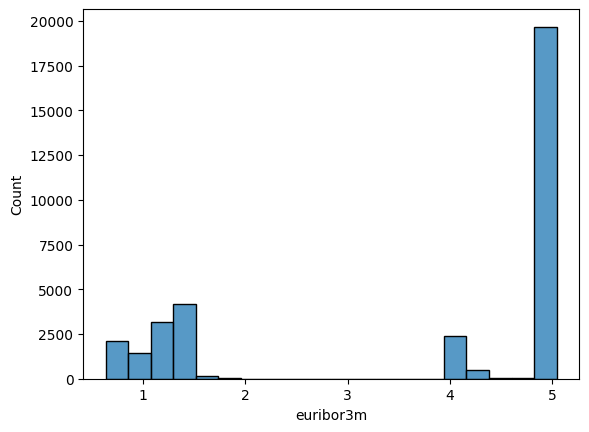

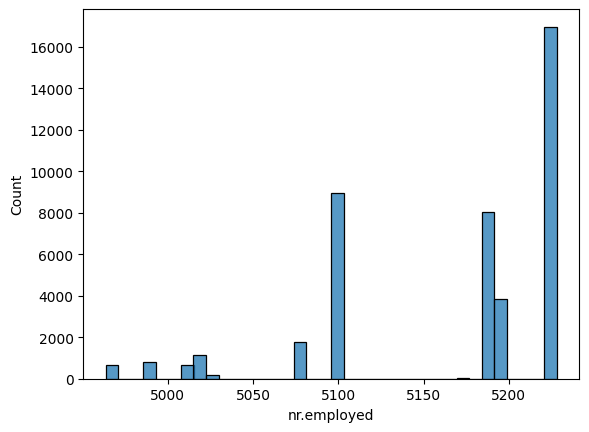

In [70]:
for col in col_numericas:
    plt.figure()
    sns.histplot(df[col])
    plt.show

## boxplot

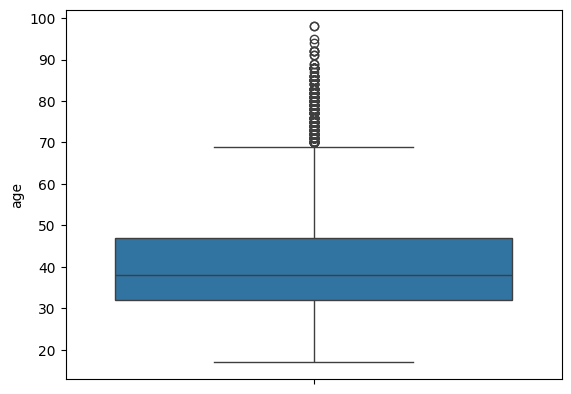

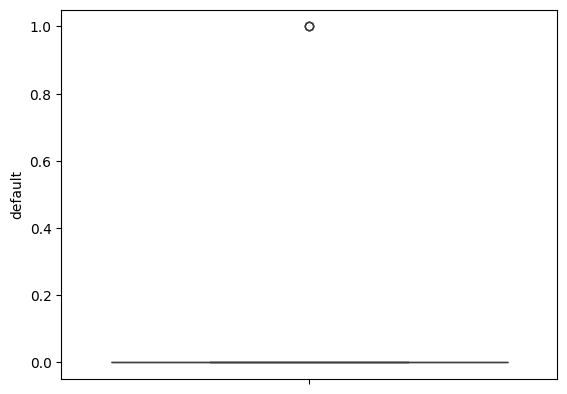

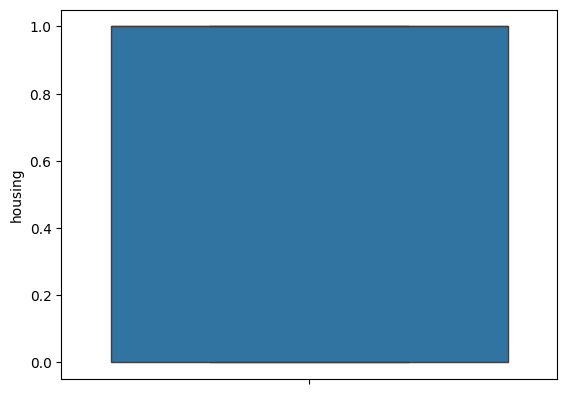

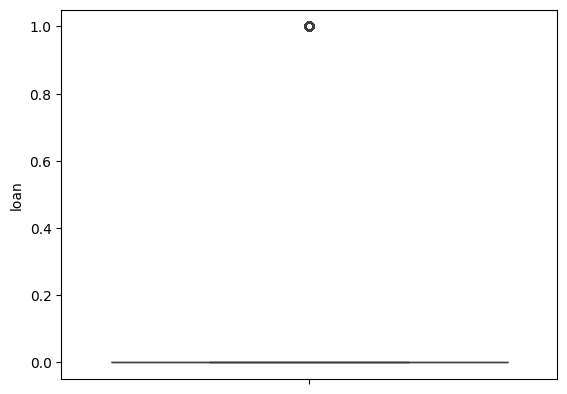

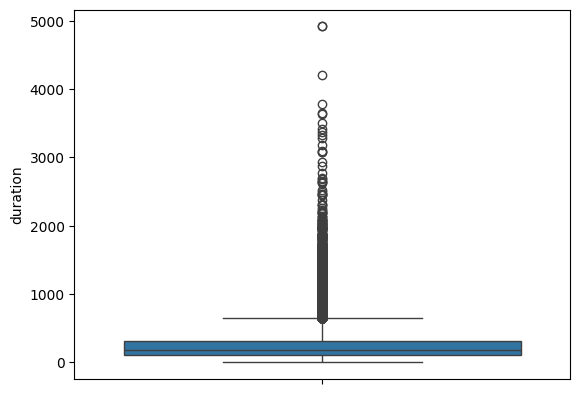

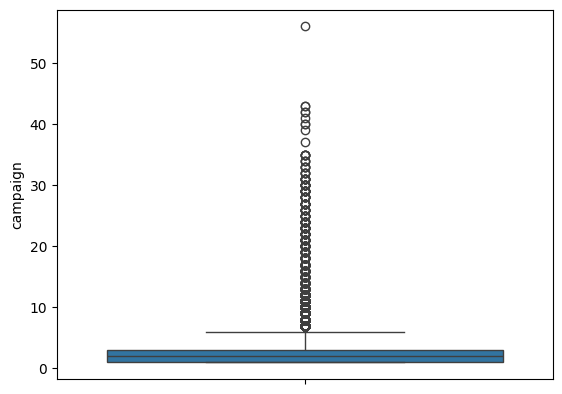

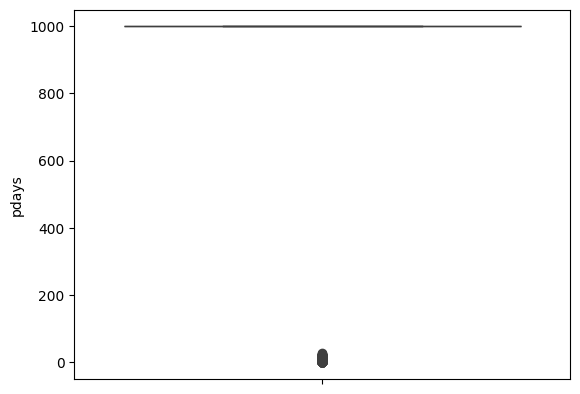

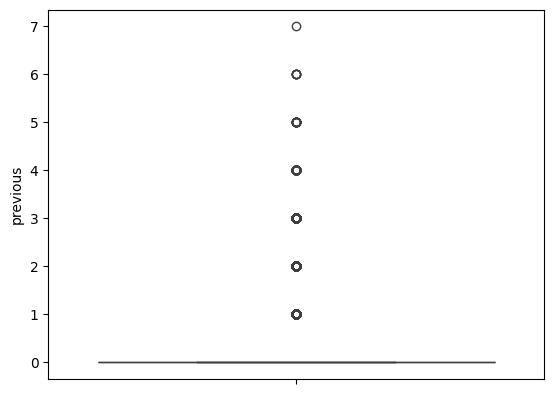

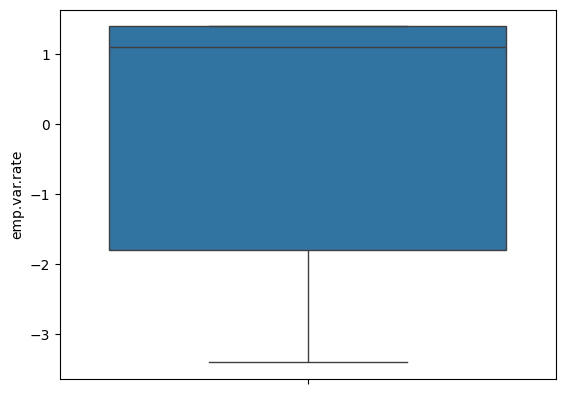

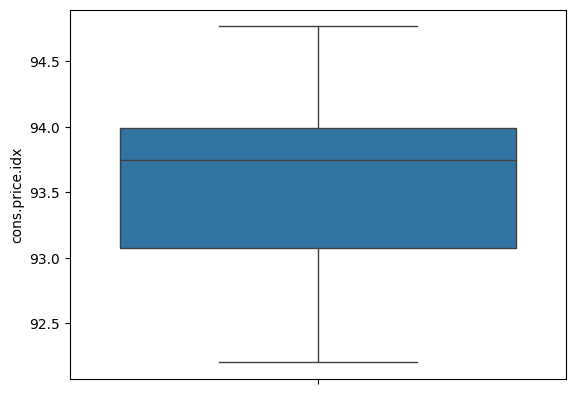

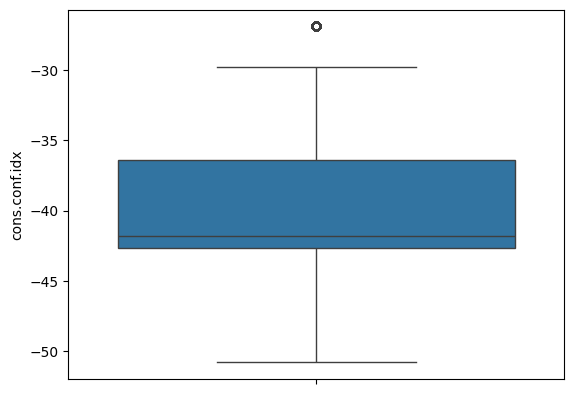

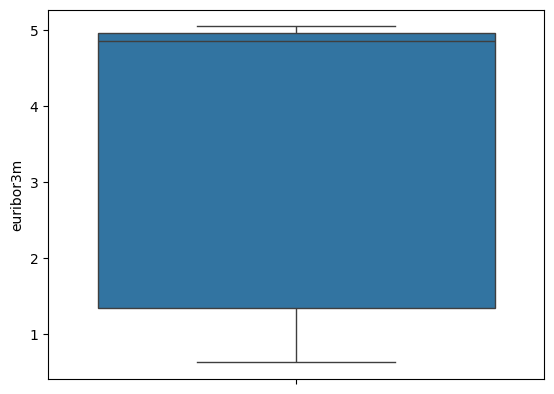

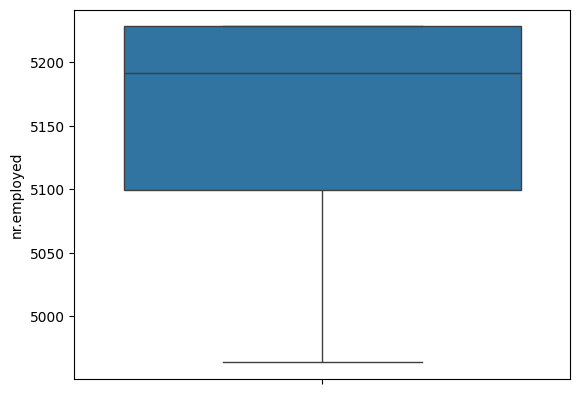

In [72]:
for col in col_numericas:
    plt.figure()
    sns.boxplot(df[col])
    plt.show()

## columnas categoricas

In [73]:
df.describe(include=['category', 'object']).T

,count,unique,top,freq
job,42655,11,admin.,10873
marital,42915,3,MARRIED,25999
education,41193,7,university.degree,12722
contact,43000,2,cellular,27396
poutcome,43000,3,NONEXISTENT,37103
y,43000,2,no,38156
id_,43000,43000,089b39d8-e4d0-461b-87d4-814d71e0e079,1


In [75]:
col_categoricas = df.select_dtypes(include=['category','object']).columns
col_categoricas

Index(['job', 'marital', 'education', 'contact', 'poutcome', 'y', 'id_'], dtype='object')

In [79]:
for col in col_categoricas:
    print(f'la columna {col} tiene un total de {df[col].nunique()} valores distintos')


la columna job tiene un total de 11 valores distintos
la columna marital tiene un total de 3 valores distintos
la columna education tiene un total de 7 valores distintos
la columna contact tiene un total de 2 valores distintos
la columna poutcome tiene un total de 3 valores distintos
la columna y tiene un total de 2 valores distintos
la columna id_ tiene un total de 43000 valores distintos


## countplot

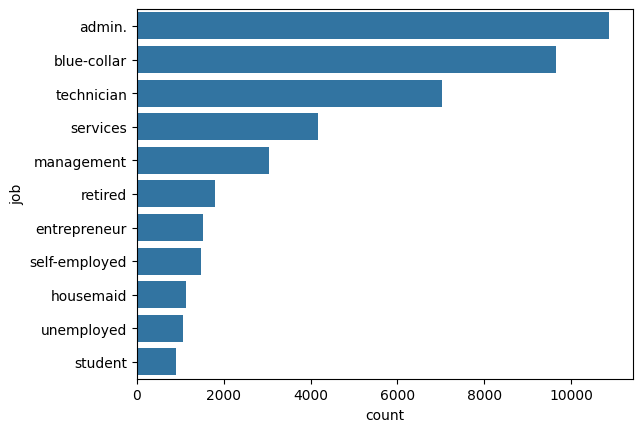

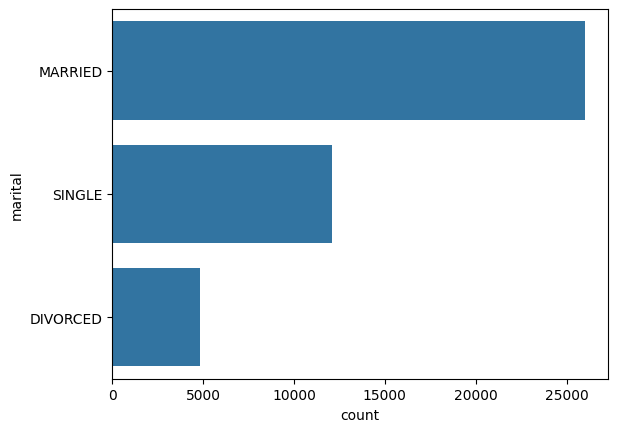

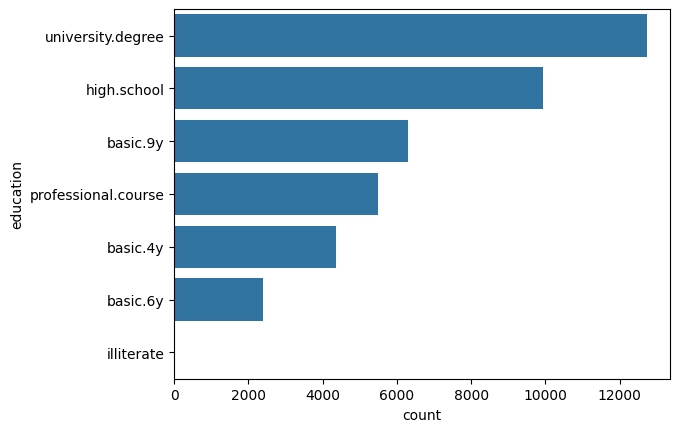

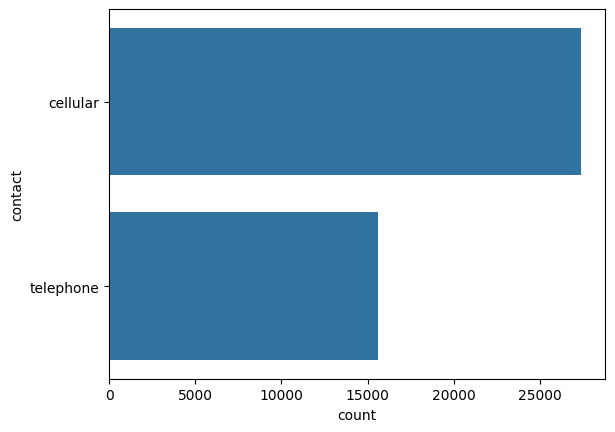

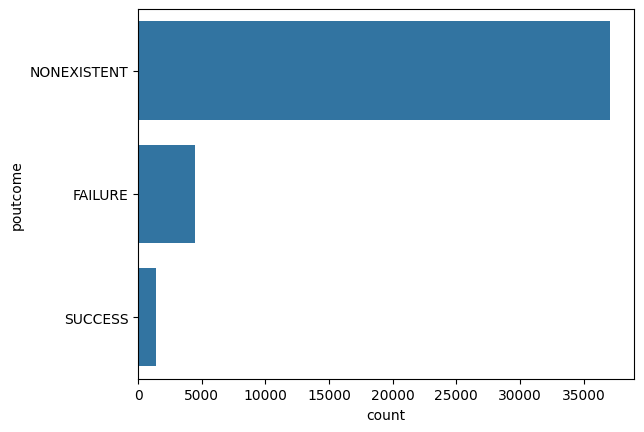

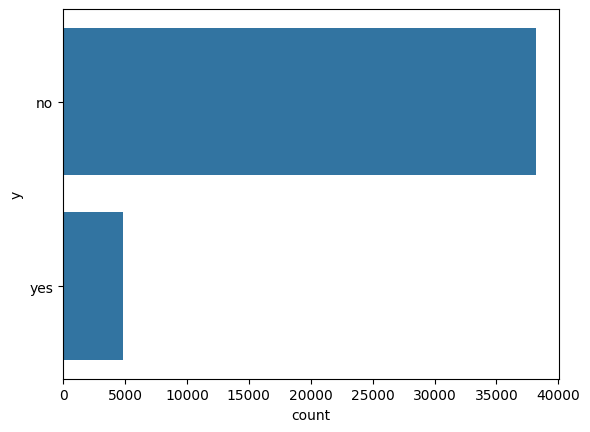

In [84]:
for col in col_categoricas:

    if col == 'id_':
        continue
    
    plt.figure()
    sns.countplot(df[col], order=df[col].value_counts().index)
    plt.show()